In [1]:
import numpy as np
import glob

In [11]:
path_opt = "results/n100_s3_recoptimized_estimate_maximize"
path_none = "results/n100_s3_recnone"

In [12]:
opt = []
for file in glob.glob(path_opt+"/*.npy"):
    arr = np.load(file)
    opt.append(arr)

In [13]:
none = []
for file in glob.glob(path_none+"/*.npy"):
    arr = np.load(file)
    none.append(arr)

In [14]:
w_opt = np.vstack(opt)
w_none = np.vstack(none)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
w_opt_mean = w_opt.mean(axis=0)
w_none_mean = w_none.mean(axis=0)
w_opt_p25 = np.percentile(w_opt, q=25, axis=0)
w_opt_p75 = np.percentile(w_opt, q=75, axis=0)
w_none_p25 = np.percentile(w_none, q=25, axis=0)
w_none_p75 = np.percentile(w_none, q=75, axis=0)

In [17]:
x_vals = np.arange(0, 10000, 1)
epsilon_vals = np.exp(-1*x_vals/(10000/8))

In [18]:
epsilon_vals

array([1.00000000e+00, 9.99200320e-01, 9.98401279e-01, ...,
       3.36268705e-04, 3.35999798e-04, 3.35731105e-04])

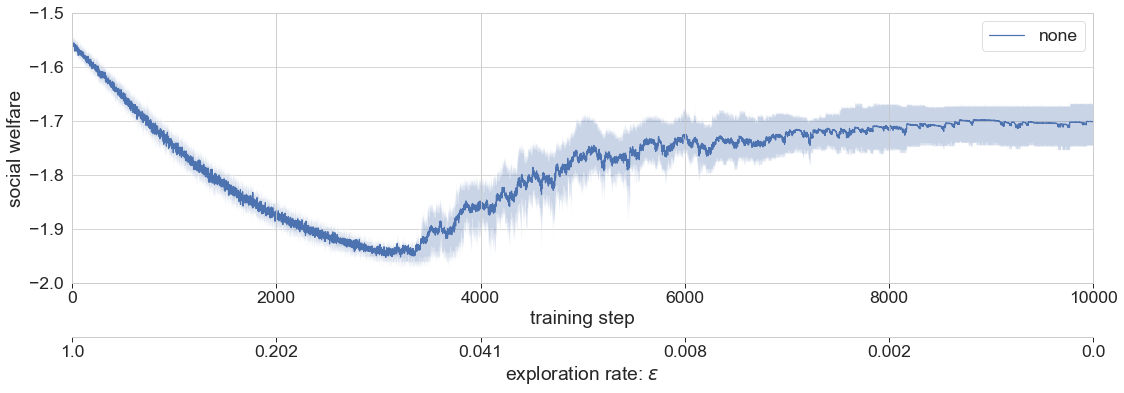

In [21]:
fig, ax = plt.subplots(figsize=(16,6))

sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
# sns.despine()

# ax.plot(w_opt_mean, label="opt")
ax.plot(w_none_mean, label="none")

#ax.fill_between(np.arange(0, 10000, 1), w_opt_p25, w_opt_p75, alpha=0.3)
ax.fill_between(np.arange(0, 10000, 1), w_none_p25, w_none_p75, alpha=0.3)

ax.set_xlim(0, 10000)
ax.set_ylim(-2, -1.5)
ax2 = ax.twiny()

# ax2.set_xlim(0, 1)
x_ticks = ax.get_xticks()
x_ticklabels = np.round(np.exp(-1*(x_ticks)/(10000/8)), decimals=3)
# ax2.set_xticks(x_ticks)
# ax2.set_xticklabels(x_ticklabels)
# ax2.set_xticks(np.linspace(ax2.get_xticks()[0], ax2.get_xticks()[-1], len(ax.get_xticks())))
# ax2.grid(None)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.2))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticklabels)
ax2.set_xlabel(r"exploration rate: $\epsilon$")

ax.set_xlabel("training step")
# ax2.set_xlabel("exploration rate")
ax.set_ylabel("social welfare")

ax.legend()
plt.tight_layout()
plt.savefig("n100_s2_optimized_vs_none.pdf", bbox_inches="tight")

In [3]:
import pandas as pd

In [4]:
import pickle

In [5]:
heatdata = pd.read_csv("results/dataframe.csv")

In [6]:
mean = heatdata.groupby(["recommender_type", "n_agents", "n_states"]).mean()
heatmap_none = pd.pivot_table(data=mean.loc["none"], values="T_mean", index="n_agents", columns="n_states")
heatmap_optimized = pd.pivot_table(data=mean.loc["optimized"], values="T_mean", index="n_agents", columns="n_states")
heatmap_random = pd.pivot_table(data=mean.loc["random"], values="T_mean", index="n_agents", columns="n_states")

In [7]:
import seaborn as sns

In [8]:
sns.set_context("paper", font_scale=3)
# sns.set_style("whitegrid")
sns.set_palette("mako")
sns.set(font="Times New Roman", font_scale=3)

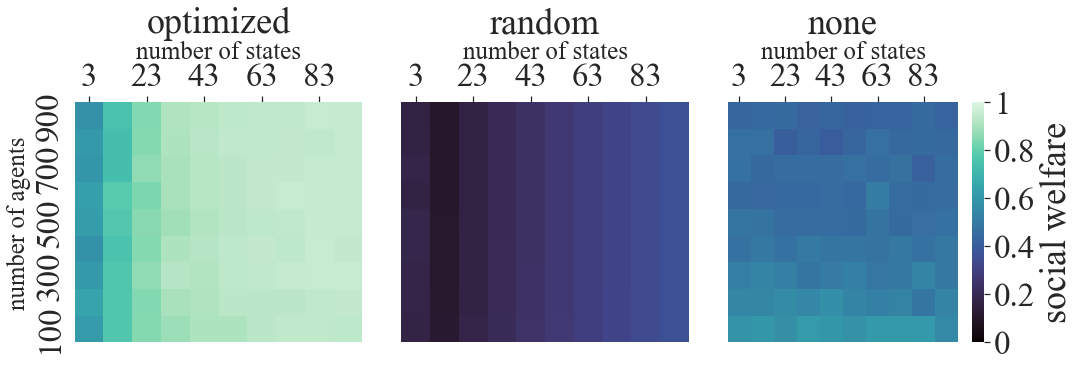

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(16,6), sharex=True)

sns.heatmap(ax=ax[0], data=heatmap_optimized, vmin=-2, vmax=-1.5, cbar=None, cmap="mako")
sns.heatmap(ax=ax[1], data=heatmap_random, vmin=-2, vmax=-1.5, cbar=None, cmap="mako")
sns.heatmap(ax=ax[2], data=heatmap_none, vmin=-2, vmax=-1.5, cmap="mako", 
            cbar_kws={'ticks': [-2, -1.9, -1.8, -1.7, -1.6, -1.5], 'label': "social welfare"})
ax[2].collections[0].colorbar.set_ticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1"])

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

ax[0].set_title("optimized")
ax[1].set_title("random")
ax[2].set_title("none")

ax[0].xaxis.tick_top()
ax[1].xaxis.tick_top()
ax[2].xaxis.tick_top()
ax[1].set_yticks([])
ax[2].set_yticks([])

ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[0].set_ylabel("number of agents", fontsize=25)
ax[0].set_xlabel("number of states", fontsize=25)
ax[0].xaxis.set_label_position('top') 
ax[1].set_xlabel("number of states", fontsize=25)
ax[1].xaxis.set_label_position('top') 
ax[2].set_xlabel("number of states", fontsize=25)
ax[2].xaxis.set_label_position('top') 

# plt.xlabel("test")
plt.tight_layout()
plt.savefig("plots/heatmap.png", bbox_inches="tight", dpi=100)

In [24]:
with open("results/timeseries.pkl", "rb") as file:
    data = pickle.load(file)

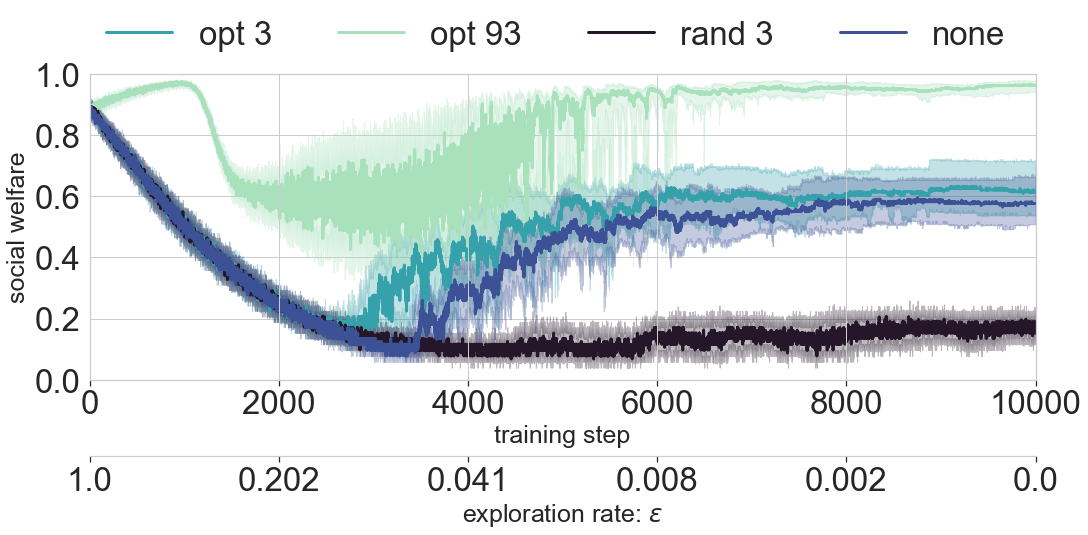

In [35]:
fig, ax = plt.subplots(figsize=(16,8))

sns.set_style("whitegrid")

cmap = plt.get_cmap('mako')
colors = [cmap(c) for c in np.linspace(0.1, 0.9, 4)]

x_vals = np.arange(0, 10000, 1)
ax.plot(data[('optimized', '100', '3')]['median'], label="opt 3", ls="-", lw=3, c=colors[2])
ax.fill_between(x_vals, 
                data[('optimized', '100', '3')]['percentile25'], 
                data[('optimized', '100', '3')]['percentile75'], 
                alpha=0.3, color=colors[2])
ax.plot(data[('optimized', '100', '93')]['median'], label="opt 93", ls="-", lw=3, c=colors[3])
ax.fill_between(x_vals, 
                data[('optimized', '100', '93')]['percentile25'], 
                data[('optimized', '100', '93')]['percentile75'], 
                alpha=0.3, color=colors[3])
ax.plot(data[('random', '100', '3')]['median'], label="rand 3", ls="-", lw=3, c=colors[0])
ax.fill_between(x_vals, 
                data[('random', '100', '3')]['percentile25'], 
                data[('random', '100', '3')]['percentile75'], 
                alpha=0.3, color=colors[0])
ax.plot(data[('none', '100', '3')]['median'], label="none", ls="-", lw=3, c=colors[1])
ax.fill_between(x_vals, 
                data[('none', '100', '3')]['percentile25'], 
                data[('none', '100', '3')]['percentile75'], 
                alpha=0.3, color=colors[1])

ax.set_xlim(0, 10000)
ax.set_ylim(-2, -1.5)
ax2 = ax.twiny()

# ax2.set_xlim(0, 1)
x_ticks = ax.get_xticks()
x_ticklabels = np.round(np.exp(-1*(x_ticks)/(10000/8)), decimals=3)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_ticklabels)
ax2.set_xlabel(r"exploration rate: $\epsilon$", fontsize=25)

ax.set_xlabel("training step", fontsize=25)
ax.set_ylabel("social welfare", fontsize=25)

y_ticks = ax.get_yticks()
ax.set_yticks(y_ticks)
ax.set_yticklabels(["%.1f"%(i/(len(y_ticks)-1)) for i in range(len(y_ticks))])

fig.legend(bbox_to_anchor=(0.51, 0.9), loc='lower center', ncol=4, frameon=False)
plt.tight_layout()
plt.savefig("plots/welfare_timeseries_comparison.png", bbox_inches="tight")

In [21]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['Times New Roman'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [ ]:
data[('random', '100', '3')]

In [ ]:
plt.plot(data[('optimized', '100', '93')]["mean"])
plt.plot(data[('optimized', '100', '93')]["percentile25"])
plt.plot(data[('optimized', '100', '93')]["percentile75"])